In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from scipy import stats
import numpy as np

In [2]:
# # download stock data direct to dataframe
# yf.pdr_override()
# df = pdr.get_data_yahoo('AAPL', start='2010-01-01', end='2020-01-01', interval='1d')
# df

In [3]:
# read data
df = pd.read_csv('./resources/apple_2000days_simulated.csv', index_col=0,parse_dates=True)
df

,Open,High,Low,Close
Date,,,,
2012-03-15,21.414642,21.428928,20.662500,20.912857
2012-03-16,21.667993,21.230310,20.144819,20.930572
2012-03-19,21.291306,20.658114,21.091190,21.007296
2012-03-20,21.030761,20.956986,21.256924,21.646664
2012-03-21,21.133868,22.110652,21.792767,21.902599
...,...,...,...,...
2020-02-20,200.995230,198.069517,202.125232,196.695259
2020-02-21,194.548671,196.145887,199.355382,189.815694
2020-02-24,193.878303,195.529161,190.208057,187.957681


In [4]:
for index, row in df.iterrows():
    
    df.loc[index,'real_body'] = df.loc[index,'Close'] - df.loc[index,'Open']
    
    if df.loc[index,'Close'] >= df.loc[index,'Open']:   
        df.loc[index,'upper_shadow'] = df.loc[index,'High'] - df.loc[index,'Close']
        df.loc[index,'lower_shadow'] = df.loc[index,'Open'] - df.loc[index,'Low']    
    else:
        df.loc[index,'upper_shadow'] = df.loc[index,'Open'] - df.loc[index,'High']
        df.loc[index,'lower_shadow'] = df.loc[index,'Low'] - df.loc[index,'Close']  
        
# tidy up
#df.drop(['Open', 'High', 'Low'], axis = 1, inplace = True)
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})
df['date'] = df.index
df = df[['date', 'open', 'high', 'low', 'close', 'upper_shadow', 'lower_shadow', 'real_body']]

df

,date,open,high,low,close,upper_shadow,lower_shadow,real_body
Date,,,,,,,,
2012-03-15,2012-03-15,21.414642,21.428928,20.662500,20.912857,-0.014286,-0.250357,-0.501785
2012-03-16,2012-03-16,21.667993,21.230310,20.144819,20.930572,0.437683,-0.785753,-0.737421
2012-03-19,2012-03-19,21.291306,20.658114,21.091190,21.007296,0.633192,0.083893,-0.284009
2012-03-20,2012-03-20,21.030761,20.956986,21.256924,21.646664,-0.689678,-0.226163,0.615903
2012-03-21,2012-03-21,21.133868,22.110652,21.792767,21.902599,0.208053,-0.658899,0.768731
...,...,...,...,...,...,...,...,...
2020-02-20,2020-02-20,200.995230,198.069517,202.125232,196.695259,2.925713,5.429973,-4.299971
2020-02-21,2020-02-21,194.548671,196.145887,199.355382,189.815694,-1.597216,9.539687,-4.732977
2020-02-24,2020-02-24,193.878303,195.529161,190.208057,187.957681,-1.650858,2.250376,-5.920621


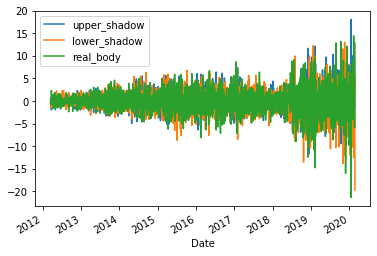

In [5]:
df[['upper_shadow', 'lower_shadow', 'real_body']].plot()

In [6]:
# #df = df[(np.abs(stats.zscore(df['close'])) < 3)]
# df = df[(np.abs(stats.zscore(df['lower_shadow'])) < 5)]
# df = df[(np.abs(stats.zscore(df['upper_shadow'])) < 5)]
# df = df[(np.abs(stats.zscore(df['real_body'])) < 5)]
# df

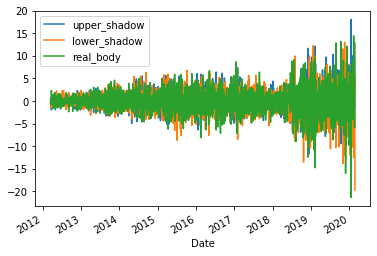

In [7]:
df[['upper_shadow', 'lower_shadow', 'real_body']].plot()

In [8]:
# # data to csv
# df.to_csv('./resources/google_10yrs_ohlc.csv', index=True,)

In [9]:
x = list(range(7))
slopeall = []
idxall = []

for h in range(8, df.shape[0]-50):
    slope50 = []

    for i in range(50):

        prev7 = df.iloc[h+i-8:h+i-1,4]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, prev7.values)
        slope50.append(slope)
        
    idxall.append(df.index[h+i])
    slopeall.append(slope50)

# print(idxall[0], slopeall[0])

In [10]:
len(slopeall)

1942

In [11]:
np.percentile(slopeall[1], 70)

0.1232140320236078

In [12]:
np.percentile(slopeall[1], 30)

0.000534686932565756

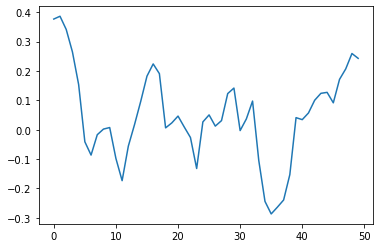

In [13]:
import matplotlib.pyplot as plt
plt.plot(slopeall[1]);

In [14]:
for i in range(len(idxall)):
    percentile70 = np.percentile(slopeall[i], 70)
    percentile30 = np.percentile(slopeall[i], 30)
    
#     if slopeall[i][49] > 0. and slopeall[i][49] >= percentile70:
    if percentile70 > 0.1 and slopeall[i][49] >= percentile70:
        df.loc[idxall[i], 'slope'] = 'positive'
        print(f'{idxall[i]} {slopeall[i][49]} is positive {percentile70}')
        
#     elif slopeall[i][49] < -0.1 and slopeall[i][49] <= percentile30:
    elif percentile30 < -0.0 and slopeall[i][49] <= percentile30:
        df.loc[idxall[i], 'slope'] = 'negative'
        print(f'{idxall[i]} {slopeall[i][49]} is negative {percentile30}')
        
    else:
        df.loc[idxall[i], 'slope'] = 'neutral'
        

2012-06-06 00:00:00 0.25940662446252943 is positive 0.1232140320236078
2012-06-07 00:00:00 0.2429857985947833 is positive 0.1232140320236078
2012-06-08 00:00:00 0.14398115695111777 is positive 0.1232140320236078
2012-06-20 00:00:00 -0.22606949899353815 is negative -0.0058947247748501385
2012-06-21 00:00:00 -0.26398067600798225 is negative -0.016761030645733914
2012-06-22 00:00:00 -0.11103868680880018 is negative -0.016761030645733914
2012-06-25 00:00:00 -0.02147312436380666 is negative -0.015240659288009356
2012-06-26 00:00:00 -0.01920106130744895 is negative -0.01455904037110204
2012-06-27 00:00:00 -0.029444448564414367 is negative -0.019882680224356266
2012-07-12 00:00:00 -0.02138899640042803 is negative -0.01455904037110204
2012-07-19 00:00:00 -0.040153774951633255 is negative -0.019857441835342677
2012-07-20 00:00:00 -0.08917249692736968 is negative -0.02141423478944162
2012-07-23 00:00:00 -0.12310976947752231 is negative -0.023864521623988978
2012-07-24 00:00:00 -0.038156348458098

2013-07-30 00:00:00 -0.26552611936499965 is negative -0.1640007577062691
2013-07-31 00:00:00 -0.1884158604240742 is negative -0.17582809308802735
2013-08-15 00:00:00 -0.10161111220852982 is negative -0.02177712891531726
2013-08-16 00:00:00 -0.05033989576713463 is negative -0.02177712891531726
2013-08-19 00:00:00 -0.09941084668390612 is negative -0.030849085977170624
2013-08-20 00:00:00 -0.09130097144133055 is negative -0.06262821846939343
2013-08-21 00:00:00 -0.23491521258704648 is negative -0.09373393401410324
2013-08-22 00:00:00 -0.2406383990871111 is negative -0.09957212795492384
2013-08-23 00:00:00 -0.21436593519257663 is negative -0.10044724930700126
2013-08-27 00:00:00 0.2841557604652378 is positive 0.17872862773292397
2013-08-28 00:00:00 0.7448171050959843 is positive 0.17872862773292397
2013-08-29 00:00:00 1.1206043074609322 is positive 0.18551630434997154
2013-08-30 00:00:00 1.1298947066100598 is positive 0.20683112345875118
2013-09-03 00:00:00 1.1377506196072125 is positive 0

2014-09-12 00:00:00 0.695483566899571 is positive 0.41517168784499986
2014-09-15 00:00:00 0.8362531614692645 is positive 0.4643245974270046
2014-09-16 00:00:00 0.5467318530457322 is positive 0.4925727490499626
2014-09-19 00:00:00 -0.6079504551498935 is negative -0.45288364328668074
2014-09-22 00:00:00 -1.0036077588647156 is negative -0.47125344944244785
2014-09-23 00:00:00 -1.0185303580130876 is negative -0.4895981543073681
2014-09-24 00:00:00 -0.8477414974948876 is negative -0.5200596061443165
2014-09-25 00:00:00 -0.9425917583074903 is negative -0.5532752433854218
2014-09-26 00:00:00 -0.7940749353045367 is negative -0.5690532411809301
2014-09-30 00:00:00 -0.7266140805985466 is negative -0.5971806341801678
2014-10-01 00:00:00 -0.9325558726267814 is negative -0.6272326025280197
2014-10-02 00:00:00 -0.8155827390854454 is negative -0.6885412200001171
2014-10-10 00:00:00 0.190518620111905 is positive 0.1338481084787232
2014-10-22 00:00:00 0.2359630280376044 is positive 0.2041519424896147
2

2016-01-06 00:00:00 0.5135795330718064 is positive 0.32367301944099586
2016-01-07 00:00:00 0.3578247420831287 is positive 0.32889658754123485
2016-01-11 00:00:00 -0.3131405813733217 is negative -0.2062431686427876
2016-01-12 00:00:00 -0.6697674156920123 is negative -0.2062431686427876
2016-01-13 00:00:00 -0.8815765389928909 is negative -0.2062431686427876
2016-01-14 00:00:00 -0.9261295168559123 is negative -0.2062431686427876
2016-01-15 00:00:00 -0.5009734575055137 is negative -0.2062431686427876
2016-01-21 00:00:00 0.5286330077465742 is positive 0.32889658754123485
2016-01-22 00:00:00 0.5703361097893657 is positive 0.32889658754123485
2016-01-25 00:00:00 0.43210359036920565 is positive 0.3414581074970976
2016-01-26 00:00:00 0.47598798177028045 is positive 0.35205350483892395
2016-01-29 00:00:00 -0.5803951170637 is negative -0.19151219758128987
2016-02-01 00:00:00 -0.5507970742549156 is negative -0.2062431686427876
2016-02-02 00:00:00 -0.6554069736181819 is negative -0.2178092423549706

2017-03-21 00:00:00 0.5686269281603838 is positive 0.28124983425157524
2017-03-22 00:00:00 0.5434913454659726 is positive 0.28124983425157524
2017-03-23 00:00:00 0.6308263072216822 is positive 0.28124983425157524
2017-03-24 00:00:00 0.41829048514920786 is positive 0.28124983425157524
2017-03-27 00:00:00 0.3711640182961636 is positive 0.28124983425157524
2017-03-29 00:00:00 -0.5922726239108741 is negative -0.47952746748067054
2017-04-11 00:00:00 -0.7135715791941727 is negative -0.5189801391403368
2017-04-12 00:00:00 -0.9011536378901681 is negative -0.5189801391403368
2017-04-13 00:00:00 -0.7331892397663692 is negative -0.5715888985827982
2017-04-25 00:00:00 0.2672218368129354 is positive 0.1774741973407361
2017-04-26 00:00:00 0.5999164323108706 is positive 0.18763600611777925
2017-04-27 00:00:00 0.42519991593258966 is positive 0.2117905868062731
2017-04-28 00:00:00 0.4140380929986403 is positive 0.23643621688506075
2017-05-05 00:00:00 0.3471658124039538 is positive 0.24873169462056288
2

2018-06-25 00:00:00 1.1251605258978907 is positive 0.9672037958265317
2018-06-26 00:00:00 1.7466874375236268 is positive 1.0229733455255237
2018-06-27 00:00:00 2.0811723204509054 is positive 1.0566549639597205
2018-06-28 00:00:00 2.2477327026765326 is positive 1.0760290534622294
2018-06-29 00:00:00 1.9687933675880456 is positive 1.1043514977709297
2018-07-02 00:00:00 1.4694995514420626 is positive 1.1458713897598822
2018-07-03 00:00:00 1.2714971164282411 is positive 1.215325541282232
2018-07-05 00:00:00 1.4566541943962033 is positive 1.2666873912607264
2018-07-06 00:00:00 2.0117495754009074 is positive 1.2666873912607264
2018-07-09 00:00:00 2.4635168134959375 is positive 1.2666873912607264
2018-07-10 00:00:00 2.655860788696845 is positive 1.2666873912607264
2018-07-11 00:00:00 2.6394447473305305 is positive 1.2666873912607264
2018-07-12 00:00:00 2.778834563072582 is positive 1.2666873912607264
2018-07-13 00:00:00 2.180885270412529 is positive 1.3270442398186293
2018-07-16 00:00:00 1.67

2019-10-09 00:00:00 1.71705665874266 is positive 1.3918619533217034
2019-10-11 00:00:00 1.5330637924137989 is positive 1.4348588781642906
2019-10-17 00:00:00 1.5194623920728896 is positive 1.505537882608975
2019-10-18 00:00:00 2.780811153373847 is positive 1.5235428121751622
2019-10-21 00:00:00 3.1326716476052097 is positive 1.5358805008250873
2019-10-22 00:00:00 3.8555688916541655 is positive 1.5605000308242258
2019-10-23 00:00:00 3.3004601046966244 is positive 1.629739685442565
2019-10-24 00:00:00 2.157705435482623 is positive 1.695287294877368
2019-11-05 00:00:00 -0.9466868468108872 is negative -0.010426733131791988
2019-11-06 00:00:00 -0.3077689904460996 is negative -0.04664515579281324
2019-11-07 00:00:00 -0.3643795230816126 is negative -0.04664515579281324
2019-11-12 00:00:00 1.8154782931637234 is positive 1.5605000308242258
2019-11-13 00:00:00 2.9147844455106933 is positive 1.629739685442565
2019-11-14 00:00:00 3.7157575268284706 is positive 1.629739685442565
2019-11-15 00:00:00

In [15]:
df['indicator'] = 'neutral'

for i in range(2,df.shape[0]):
    current = df.iloc[i,:]
    prev = df.iloc[i-1,:]
    prev_2 = df.iloc[i-2,:]
    

#     rb3_op = current['open']
#     rb3_cl = current['close']
#     rb2_op = prev['open']
#     rb2_cl = prev['close']
#     rb1_op = prev_2['open']
#     rb1_cl = prev_2['close']

#     rb3 = rb3_op - rb3_cl
#     rb2 = rb2_op - rb2_cl
#     rb1 = rb1_op - rb1_cl
    
    rb3_b = min([current['open'], current['close']])
    rb3_t = max([current['open'], current['close']])
    rb2_b = min([prev['open'], prev['close']])
    rb2_t = max([prev['open'], prev['close']])
    rb1_b = min([prev_2['open'], prev_2['close']])
    rb1_t = max([prev_2['open'], prev_2['close']])
    
    rb2_ha = 0.5*abs(rb2_t - rb2_b)
    
    idx = df.index[i]
    
#     if df.loc[idx, 'slope'] == 'negative' and current['low'] > prev['low'] and prev['low'] < prev_2['low']:
#         df.loc[idx,'indicator'] = 'buy'
        
#     if df.loc[idx, 'slope'] == 'positive' and current['high'] < prev['high'] and prev['high'] > prev_2['high']:
#         df.loc[idx,'indicator'] = 'sell'
        
#     if df.loc[idx, 'slope'] == 'negative' and \
#         ((rb1_op+rb2_ha) > rb2_op and (rb1_cl+rb2_ha) > rb2_cl and (rb1_op+rb2_ha) > rb2_cl and (rb1_cl+rb2_ha) > rb2_op) and \
#         ((rb3_op+rb2_ha) > rb2_op and (rb3_cl+rb2_ha) > rb2_cl and (rb3_op+rb2_ha) > rb2_cl and (rb3_cl+rb2_ha) > rb2_op):
# #         (rb3_op < rb1_op and rb3_cl > rb1_cl and rb3_op > rb1_cl and rb3_cl < rb1_op) and \
# #         rb2 < 0.9*abs(rb1) and rb2 < 0.9*abs(rb3) and \
# #         rb3 < 0. and rb1 > 0:
#         df.loc[idx,'indicator'] = 'morning-star'
    
    if df.loc[idx, 'slope'] == 'negative' and \
        ((rb1_b-rb2_ha) > rb2_b) and \
        ((rb3_b-rb2_ha) > rb2_b) and \
        rb1_t > rb2_t and rb3_t > rb2_t:
#         (rb3_op < rb1_op and rb3_cl > rb1_cl and rb3_op > rb1_cl and rb3_cl < rb1_op) and \
#         rb2 < 0.9*abs(rb1) and rb2 < 0.9*abs(rb3) and \
#         rb3 < 0. and rb1 > 0:
        df.loc[idx,'indicator'] = 'buy'
        
        
    if df.loc[idx, 'slope'] == 'positive' and \
        ((rb1_t+rb2_ha) < rb2_t) and \
        ((rb3_t+rb2_ha) < rb2_t) and \
        rb1_b < rb2_b and rb3_b < rb2_b:
#         (rb3_op < rb1_op and rb3_cl > rb1_cl and rb3_op > rb1_cl and rb3_cl < rb1_op) and \
#         rb2 < 0.9*abs(rb1) and rb2 < 0.9*abs(rb3) and \
#         rb3 < 0. and rb1 > 0:
        df.loc[idx,'indicator'] = 'sell'
        

In [16]:
df['indicator'].value_counts()

neutral    1913
sell         45
buy          42
Name: indicator, dtype: int64

In [17]:
for i in range(0, df.shape[0]):
    idx = df.index[i]
    if df.loc[idx, 'indicator'] == 'buy':
        print(f'{idx}')

2012-06-21 00:00:00
2012-06-27 00:00:00
2012-08-02 00:00:00
2012-09-10 00:00:00
2012-09-12 00:00:00
2012-10-11 00:00:00
2012-12-05 00:00:00
2013-01-16 00:00:00
2013-08-15 00:00:00
2013-08-21 00:00:00
2014-02-19 00:00:00
2014-03-26 00:00:00
2014-08-04 00:00:00
2014-08-11 00:00:00
2014-10-01 00:00:00
2014-11-11 00:00:00
2014-11-19 00:00:00
2015-02-27 00:00:00
2015-06-25 00:00:00
2015-10-21 00:00:00
2016-01-11 00:00:00
2016-04-07 00:00:00
2016-05-04 00:00:00
2016-07-20 00:00:00
2016-08-29 00:00:00
2016-08-31 00:00:00
2016-10-12 00:00:00
2016-10-19 00:00:00
2016-11-02 00:00:00
2017-06-21 00:00:00
2017-11-03 00:00:00
2017-12-29 00:00:00
2018-11-07 00:00:00
2019-02-05 00:00:00
2019-03-08 00:00:00
2019-06-10 00:00:00
2019-06-19 00:00:00
2019-06-26 00:00:00
2019-09-13 00:00:00
2019-11-06 00:00:00
2020-01-24 00:00:00
2020-01-28 00:00:00


In [18]:
for i in range(0, df.shape[0]):
    idx = df.index[i]
    if df.loc[idx, 'indicator'] == 'sell':
        print(f'{idx}')

2013-05-06 00:00:00
2013-06-12 00:00:00
2013-06-14 00:00:00
2013-09-05 00:00:00
2013-09-17 00:00:00
2013-10-10 00:00:00
2013-11-25 00:00:00
2014-01-08 00:00:00
2014-03-07 00:00:00
2014-03-19 00:00:00
2014-07-17 00:00:00
2014-09-12 00:00:00
2014-10-10 00:00:00
2015-02-02 00:00:00
2015-07-01 00:00:00
2015-08-13 00:00:00
2015-10-08 00:00:00
2015-11-18 00:00:00
2015-12-16 00:00:00
2015-12-22 00:00:00
2016-04-14 00:00:00
2016-08-23 00:00:00
2017-04-26 00:00:00
2017-04-28 00:00:00
2017-05-23 00:00:00
2017-06-02 00:00:00
2017-06-27 00:00:00
2017-08-31 00:00:00
2017-09-06 00:00:00
2017-10-11 00:00:00
2017-12-05 00:00:00
2017-12-14 00:00:00
2018-03-26 00:00:00
2018-04-02 00:00:00
2018-08-01 00:00:00
2018-10-03 00:00:00
2018-10-29 00:00:00
2019-05-14 00:00:00
2019-07-03 00:00:00
2019-09-04 00:00:00
2019-10-11 00:00:00
2019-10-23 00:00:00
2019-11-13 00:00:00
2020-01-16 00:00:00
2020-02-07 00:00:00


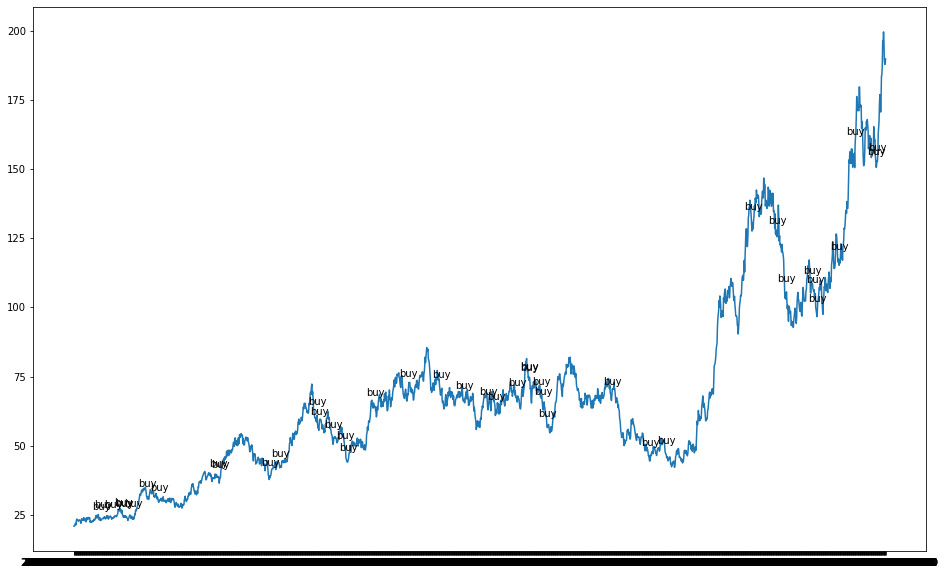

In [19]:
# zip joins x and y coordinates in pairs
yf = list(df['close'])
date = df.index
xf = []
for i in date:
    xf.append(str(i))

plt.figure(figsize=(16,10))
plt.plot(xf, yf)

ys = list(df['close'][df['indicator'] == 'buy'])
date = df.index[df['indicator'] == 'buy']
xs = []
for i in date:
    xs.append(str(i))

    
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate('buy', # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

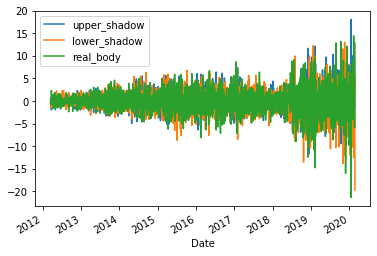

In [20]:
df[['upper_shadow', 'lower_shadow', 'real_body']].plot()

In [21]:
# data to csv
df.to_csv('./resources/google_10yrs_culr_labelled.csv', index=False,)